In [11]:
from docembedder import CountVecEmbedder, TfidfEmbedder
from docembedder.preprocessor.parser import read_xz
from docembedder.analysis import classification_benchmark
from matplotlib import pyplot as plt
from tqdm import tqdm

In [5]:
models = {
    "tfidf": TfidfEmbedder(),
    "count-sigmoid": CountVecEmbedder("sigmoid"),
    "count-prop": CountVecEmbedder("prop"),
}

In [9]:
results = {name: [] for name in models}
all_years = []
for year in tqdm(range(1880, 1920)):
    patents = read_xz(f"../data/unprocessed/{year}.xz")
    documents = [pat["contents"] for pat in patents]
    res = classification_benchmark(patents, models, n_patents=10000, n_class_sample=20000)
    for model_name, r in res.items():
        results[model_name].append(r)
    all_years.append(year)
    

  2%|█▋                                                               | 1/40 [01:13<47:47, 73.52s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
  5%|███▎                                                             | 2/40 [02:32<48:25, 76.47s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
  8%|████▉                                                            | 3/40 [03:53<48:27, 78.58s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 10%|██████▌                                                          | 4/40 [05:19<48:54, 81.51s/it]/home/qubix/Documents/shared_

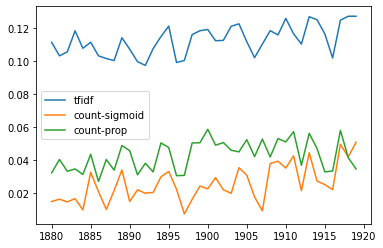

In [12]:
for model_name, res in results.items():
    plt.plot(all_years, res, label=model_name)
plt.legend()
plt.show()